### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [2]:
import tensorflow
import keras

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Change train and test labels into one-hot vectors

In [4]:
Y_train=keras.utils.to_categorical(train_y,num_classes=10)
Y_train.shape

(60000, 10)

In [5]:
Y_test=keras.utils.to_categorical(test_y,num_classes=10)
Y_test.shape

(10000, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense,Activation,Dropout,Flatten,Reshape

In [0]:
from keras.layers import Convolution2D,MaxPooling2D

In [12]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')
train_x /= 255
test_x /= 255
model=Sequential()
model.add(Reshape((784,), input_shape=(28, 28, 1)))

W0616 13:19:21.224566 140102552258432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [14]:
model.add(Dense(200,activation='relu',init='uniform'))
model.add(Dense(100,activation='relu',init='uniform'))
model.add(Dropout(0.25))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  
W0616 13:20:43.504882 140102552258432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 13:20:43.516969 140102552258432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instea

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [16]:
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0616 13:31:15.464423 140102552258432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 13:31:15.496347 140102552258432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [21]:
model.fit(train_x,Y_train,batch_size=32,nb_epoch=20,validation_data=(test_x, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  800/60000 [..............................] - ETA: 13s - loss: 0.3748 - acc: 0.8775

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 11s 190us/step - loss: 0.3827 - acc: 0.8643 - val_loss: 0.4035 - val_acc: 0.8586
Epoch 2/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.3692 - acc: 0.8698 - val_loss: 0.4016 - val_acc: 0.8547
Epoch 3/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.3605 - acc: 0.8717 - val_loss: 0.3969 - val_acc: 0.8545
Epoch 4/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.3516 - acc: 0.8746 - val_loss: 0.3922 - val_acc: 0.8599
Epoch 5/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.3416 - acc: 0.8777 - val_loss: 0.3746 - val_acc: 0.8651
Epoch 6/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.3348 - acc: 0.8805 - val_loss: 0.3784 - val_acc: 0.8617
Epoch 7/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.3270 - acc: 0.8821 - val_loss: 0.3843 - val_acc: 0.8614
Epoch 8/20
60000/60000 [==============

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


### **Load CIFAR10 dataset**

In [0]:
from tensorflow.keras.datasets import cifar10


In [0]:
(train_x_CIFAR,train_y_CIFAR),(test_x_CIFAR,test_y_CIFAR)=cifar10.load_data()

In [42]:
train_x_CIFAR.shape

(50000, 32, 32, 3)

In [0]:
train_x_CIFAR = train_x_CIFAR.reshape(train_x_CIFAR.shape[0], 32, 32, 3).astype('float32')


In [0]:
train_x_CIFAR/=255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(train_x_CIFAR)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

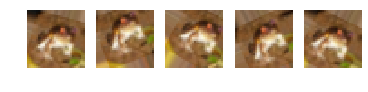

In [49]:
from matplotlib import pyplot as plt
gen = datagen.flow(train_x_CIFAR[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()